# Task 4-1: 주가 변동 라인 그래프

## 과제 내용
- 주식 데이터(삼성전자, 카카오, 네이버)를 활용하여 주가 변동을 시각화
- Numpy, Matplotlib, Pandas를 활용하여 주가 변동 라인 그래프 생성


In [15]:
# 필요한 라이브러리 import
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False


In [16]:
def load_data():
    """데이터 로드 함수"""
    print("📊 데이터 로드 중...")
    
    csv_path = os.path.join('data', 'stock_close_prices.csv')
    
    if not os.path.exists(csv_path):
        print(f"❌ 데이터 파일이 없습니다: {csv_path}")
        print("먼저 task1_주식데이터수집.py를 실행해주세요.")
        return None
    
    # CSV 파일 읽기
    df = pd.read_csv(csv_path)
    print(f"✅ 원본 데이터 로드 완료: {len(df)}개 데이터")
    
    # 종목별로 데이터 분리하고 Close 가격만 추출
    companies = df['company'].unique()
    print(f"📋 종목: {list(companies)}")
    
    # 각 종목의 Close 가격을 추출하여 새로운 DataFrame 생성
    close_data = {}
    for company in companies:
        company_data = df[df['company'] == company]
        close_data[company] = company_data['close'].values
    
    # DataFrame으로 변환
    data = pd.DataFrame(close_data, index=pd.to_datetime(df[df['company'] == companies[0]]['date']))
    
    print(f"✅ 데이터 전처리 완료: {len(data)}개 데이터, {len(data.columns)}개 종목")
    print(f"📅 기간: {data.index[0].strftime('%Y-%m-%d')} ~ {data.index[-1].strftime('%Y-%m-%d')}")
    
    return data


In [17]:
def plot_stock_prices(data):
    """주가 변동 라인 그래프 생성"""
    print("📊 주가 변동 그래프 생성 중...")
    
    plt.figure(figsize=(15, 8))
    
    # 각 종목별로 그래프 그리기
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # 파란색, 주황색, 초록색
    
    for i, (stock, color) in enumerate(zip(data.columns, colors)):
        plt.plot(data.index, data[stock], 
                label=stock, 
                linewidth=2, 
                color=color,
                alpha=0.8)
    
    # 그래프 설정
    plt.title('주식 가격 변동 추이', fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('날짜', fontsize=12)
    plt.ylabel('가격 (원)', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    
    # 레이아웃 조정
    plt.tight_layout()
    
    # 그래프 저장
    plot_path = os.path.join('plots', 'stock_prices.png')
    plt.savefig(plot_path, dpi=300, bbox_inches='tight')
    print(f"✅ 그래프 저장 완료: {plot_path}")
    
    # 그래프 표시
    plt.show()
    
    return plot_path


🚀 Task 4-1: 주가 변동 라인 그래프
📊 데이터 로드 중...
✅ 원본 데이터 로드 완료: 2685개 데이터
📋 종목: ['삼성전자', '네이버', '카카오']
✅ 데이터 전처리 완료: 895개 데이터, 3개 종목
📅 기간: 2022-01-04 ~ 2025-09-01
📊 주가 변동 그래프 생성 중...
✅ 그래프 저장 완료: plots\stock_prices.png


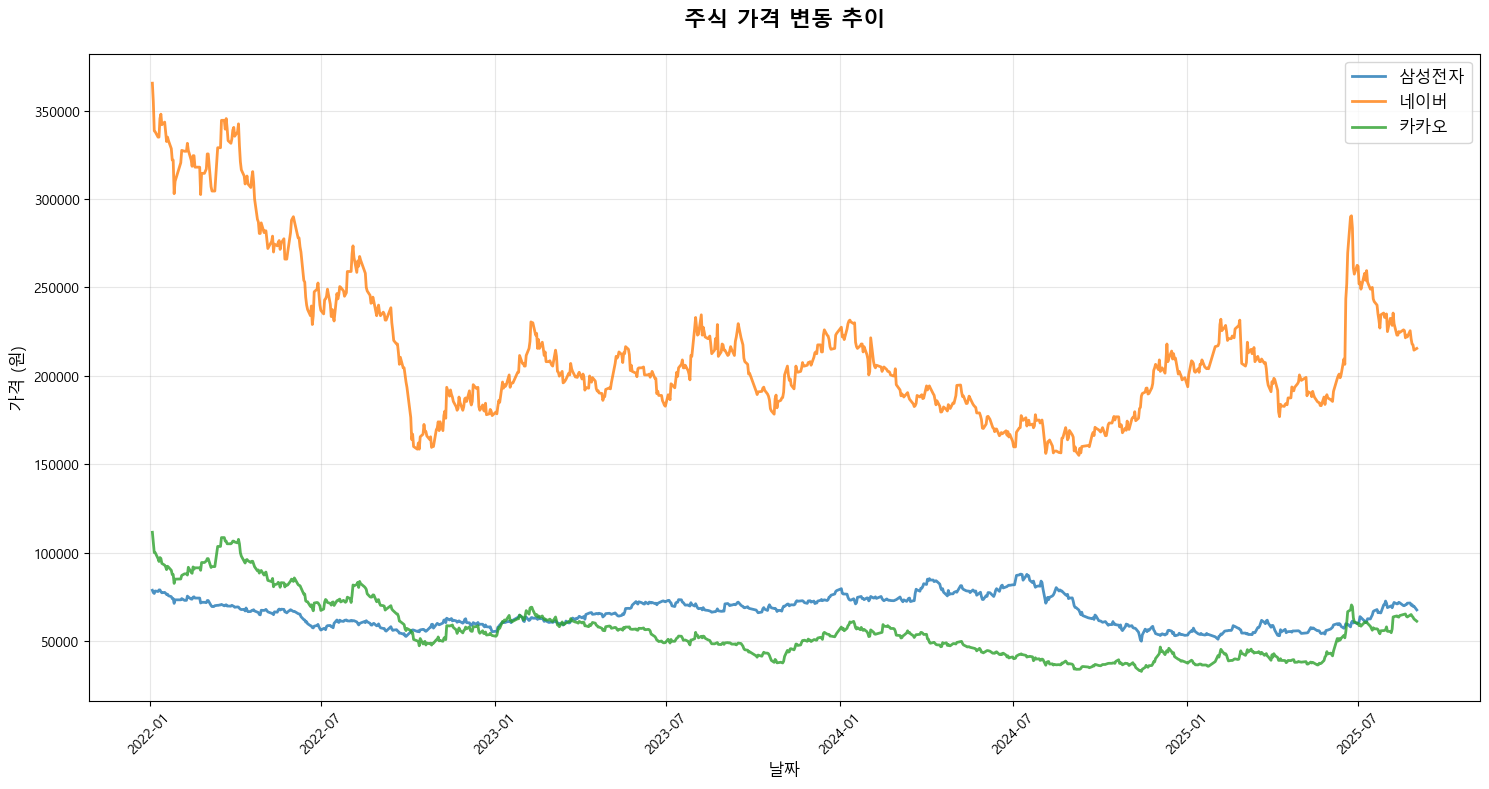


🎉 Task 4-1 완료!
📁 결과 파일: plots\stock_prices.png


In [18]:
# 메인 실행
print("=" * 60)
print("🚀 Task 4-1: 주가 변동 라인 그래프")
print("=" * 60)

# 1. 데이터 로드
data = load_data()

if data is not None:
    # 2. 주가 변동 그래프 생성
    plot_path = plot_stock_prices(data)
    
    print("\n🎉 Task 4-1 완료!")
    print(f"📁 결과 파일: {plot_path}")
else:
    print("❌ 데이터 로드를 실패했습니다.")
